# ControlNet Based Pipeline

In [1]:
import os
import urllib.request
from io import BytesIO
import requests
import json

import torch

from PIL import Image
import numpy as np
import cv2
import matplotlib.pyplot as plt
import scipy
import h5py

import open3d as o3d

import matplotlib.image as mpimg
import re
from csv import writer

from models_3d import *
from utils.preprocessing import *
from models.model_data import *
from models import controlnet_model_wrapper


WARNING[XFORMERS]: xFormers can't load C++/CUDA extensions. xFormers was built for:
    PyTorch 1.13.1+cu117 with CUDA 1107 (you have 1.12.1+cpu)
    Python  3.8.10 (you have 3.8.16)
  Please reinstall xformers (see https://github.com/facebookresearch/xformers#installing-xformers)
  Memory-efficient attention, SwiGLU, sparse and more won't be available.
  Set XFORMERS_MORE_DETAILS=1 for more details
C:\Users\User\anaconda3\envs\stable_diff\lib\site-packages\torchvision\io\image.py:13: UserWarning: Failed to load image Python extension: Could not find module 'C:\Users\User\anaconda3\envs\stable_diff\Lib\site-packages\torchvision\image.pyd' (or one of its dependencies). Try using the full path with constructor syntax.
  warn(f"Failed to load image Python extension: {e}")


### Prompt Ideas

In [2]:
interior_design_prompt_1 = "Intricate, Ornate, Embellished, Elaborate, Detailed, Decorative, Intricately-crafted, Luxurious, Ornamented, and Artistic cloak, open book, sparks, cozy library in background, furniture, fire place, food, wine, pet, chandelier, High Definition, Night time, Photorealism, realistic"
interior_design_prompt_2 = "Residential home high end futuristic interior, olson kundig, Interior Design by Dorothy Draper, maison de verre, axel vervoordt, award winning photography of an indoor-outdoor living library space, minimalist modern designs, high end indoor/outdoor residential living space, rendered in vray, rendered in octane, rendered in unreal engine, architectural photography, photorealism, featured in dezeen, cristobal palma. 5 chaparral landscape outside, black surfaces/textures for furnishings in outdoor space"
#interior_design_prompt_3 = 

# Test Code

In [3]:
nyu_path = 'C:/Users/User/Documents/Data_Science/ar_stable_diffusion/data/nyu_depth_v2_labeled.mat'
nyu_result_root = './results/NYU/'
eval_results_path = nyu_result_root + "eval_logs.csv"

save_folder = nyu_result_root

guidance_scale = 7.5
strength=0.5
num_inference_steps=30

prompt= "baroque style palace room with ornate marble decorations and statues, landscape paintings on the walls, warm ambient lighting and painted ceiling"

prompt=interior_design_prompt_1

# read mat file
f = h5py.File(nyu_path)


C:\Users\User\AppData\Local\Temp\ipykernel_31656\4040629913.py:16: H5pyDeprecationWarning: The default file mode will change to 'r' (read-only) in h5py 3.0. To suppress this warning, pass the mode you need to h5py.File(), or set the global default h5.get_config().default_file_mode, or set the environment variable H5PY_DEFAULT_READONLY=1. Available modes are: 'r', 'r+', 'w', 'w-'/'x', 'a'. See the docs for details.
  f = h5py.File(nyu_path)


In [4]:
#use_predicted_ground = False
CONDITION_TYPE = "seg"

f = h5py.File(nyu_path)

rgb_images = f['images']
depth_maps = f['depths']
accel_data = f['accelData']
#seg_mask = f['labels']

# number of segmentation classes
num_classes = f['names'].shape[1]

if CONDITION_TYPE == "depth":
    condition_data = depth_maps
elif CONDITION_TYPE == "seg":
    condition_data = f['labels']
elif CONDITION_TYPE == "normal":
    condition_data = f['normals']
    
pipeline = controlnet_model_wrapper.ControlNetModelWrapper(condition_type=CONDITION_TYPE, 
                                                        multi_condition=True, result_root=nyu_result_root)

C:\Users\User\AppData\Local\Temp\ipykernel_31656\1903368894.py:4: H5pyDeprecationWarning: The default file mode will change to 'r' (read-only) in h5py 3.0. To suppress this warning, pass the mode you need to h5py.File(), or set the global default h5.get_config().default_file_mode, or set the environment variable H5PY_DEFAULT_READONLY=1. Available modes are: 'r', 'r+', 'w', 'w-'/'x', 'a'. See the docs for details.
  f = h5py.File(nyu_path)
Using cache found in C:\Users\User/.cache\torch\hub\intel-isl_MiDaS_master


Loading weights:  None


Using cache found in C:\Users\User/.cache\torch\hub\facebookresearch_WSL-Images_main
Using cache found in C:\Users\User/.cache\torch\hub\intel-isl_MiDaS_master
C:\Users\User\anaconda3\envs\stable_diff\lib\site-packages\transformers\models\maskformer\image_processing_maskformer.py:401: FutureWarning: The `size_divisibility` argument is deprecated and will be removed in v4.27. Please use `size_divisor` instead.
  warnings.warn(
C:\Users\User\anaconda3\envs\stable_diff\lib\site-packages\transformers\models\maskformer\image_processing_maskformer.py:408: FutureWarning: The `max_size` argument is deprecated and will be removed in v4.27. Please use size['longest_edge'] instead.
  warnings.warn(
C:\Users\User\anaconda3\envs\stable_diff\lib\site-packages\transformers\models\clip\feature_extraction_clip.py:28: FutureWarning: The class CLIPFeatureExtractor is deprecated and will be removed in version 5 of Transformers. Please use CLIPImageProcessor instead.
  warnings.warn(
You have disabled the 

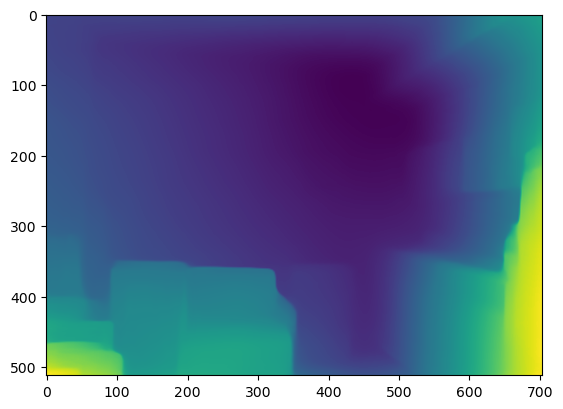

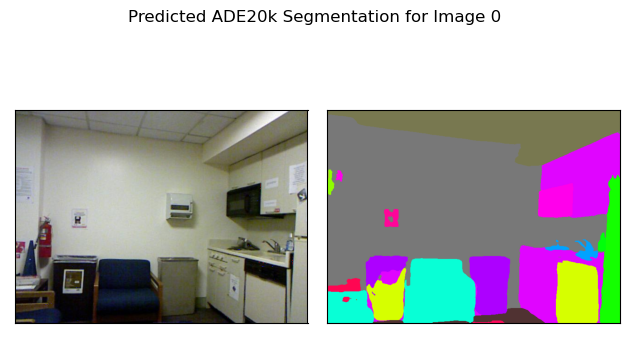

  0%|          | 0/30 [00:00<?, ?it/s]

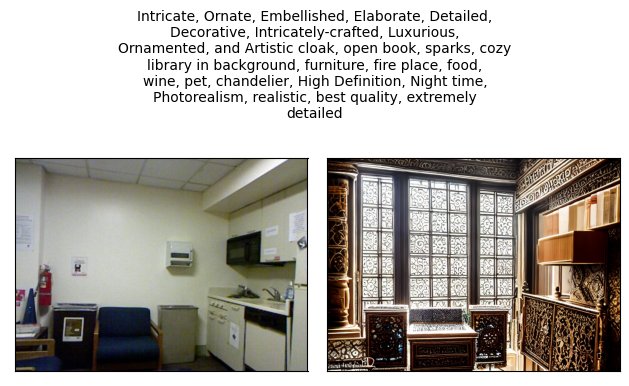

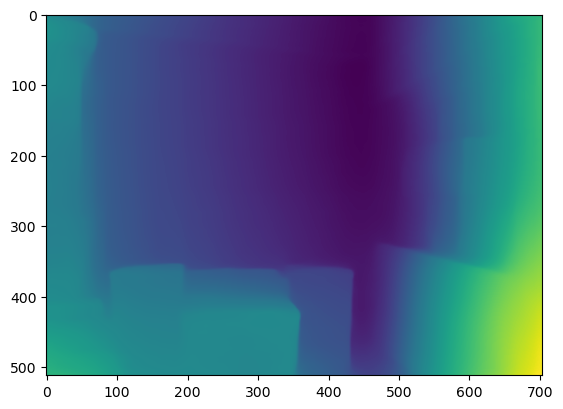

C:\Users\User\Documents\Data_Science\ar_stable_diffusion\utils\visualisation.py:30: UserWarning: FixedFormatter should only be used together with FixedLocator
  cbar.ax.set_yticklabels(["{:.2}".format(i) + " m" for i in cbar.get_ticks()])  # set ticks of your format


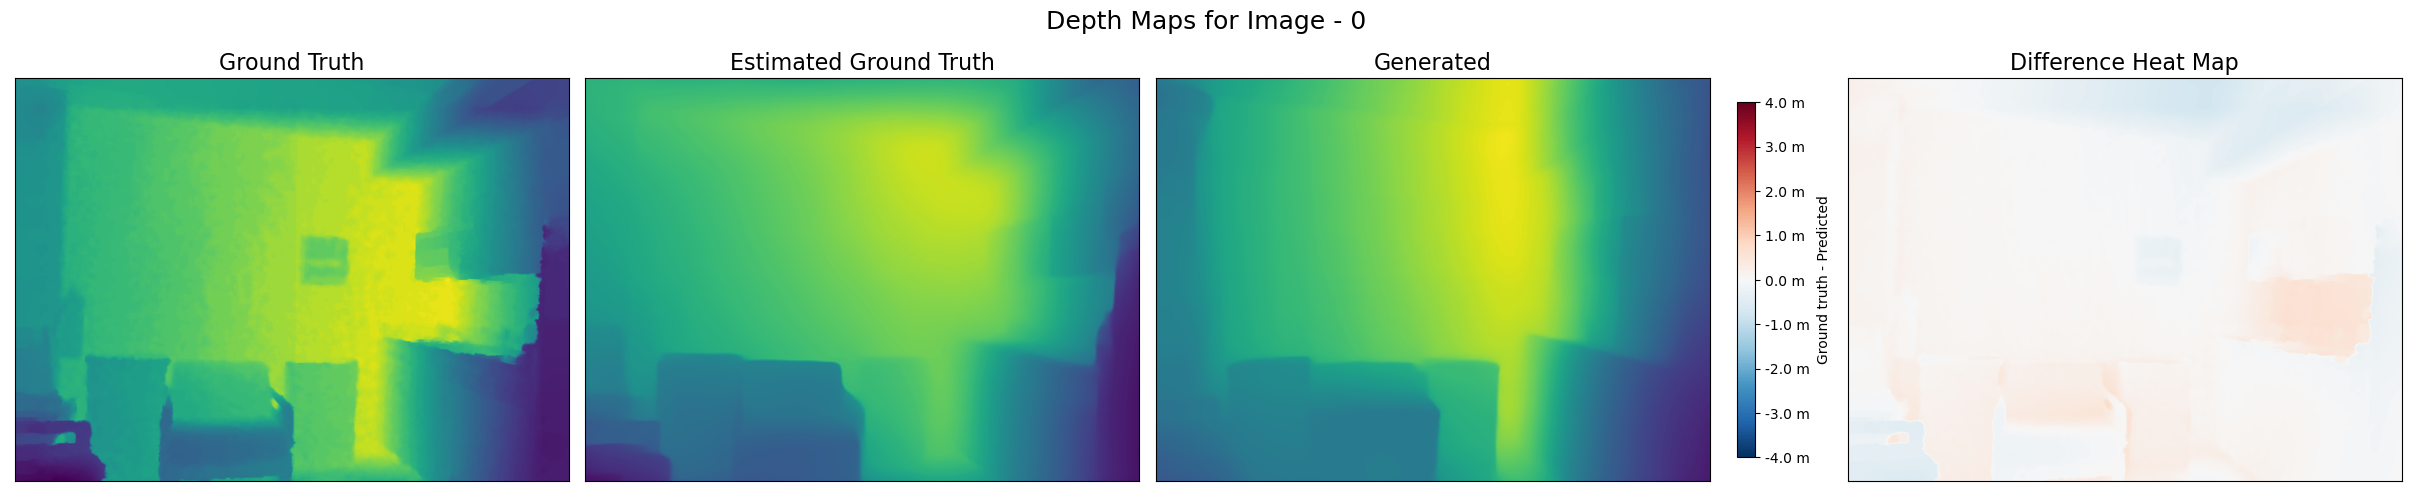

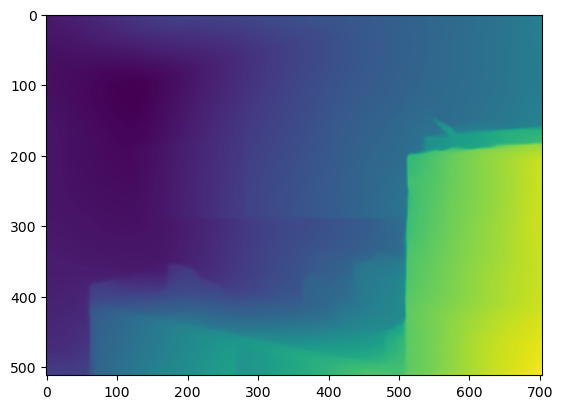

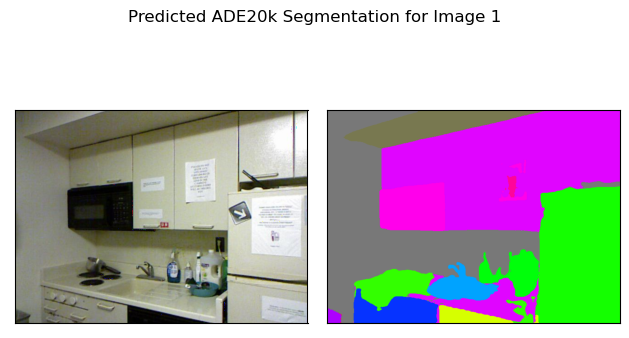

  0%|          | 0/30 [00:00<?, ?it/s]

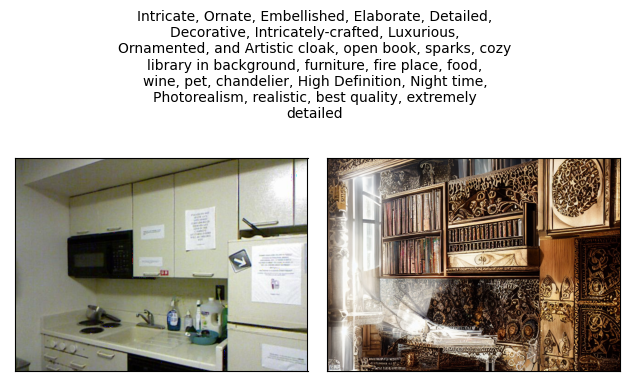

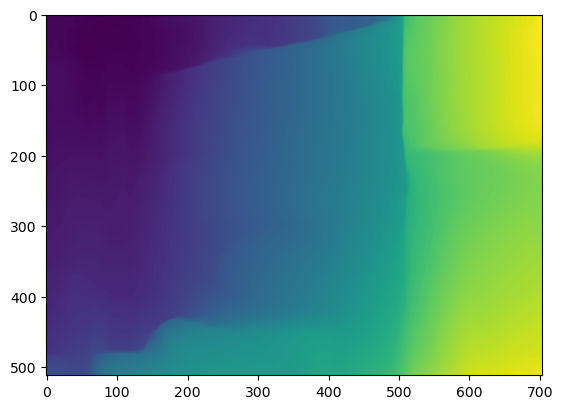

C:\Users\User\Documents\Data_Science\ar_stable_diffusion\utils\visualisation.py:30: UserWarning: FixedFormatter should only be used together with FixedLocator
  cbar.ax.set_yticklabels(["{:.2}".format(i) + " m" for i in cbar.get_ticks()])  # set ticks of your format


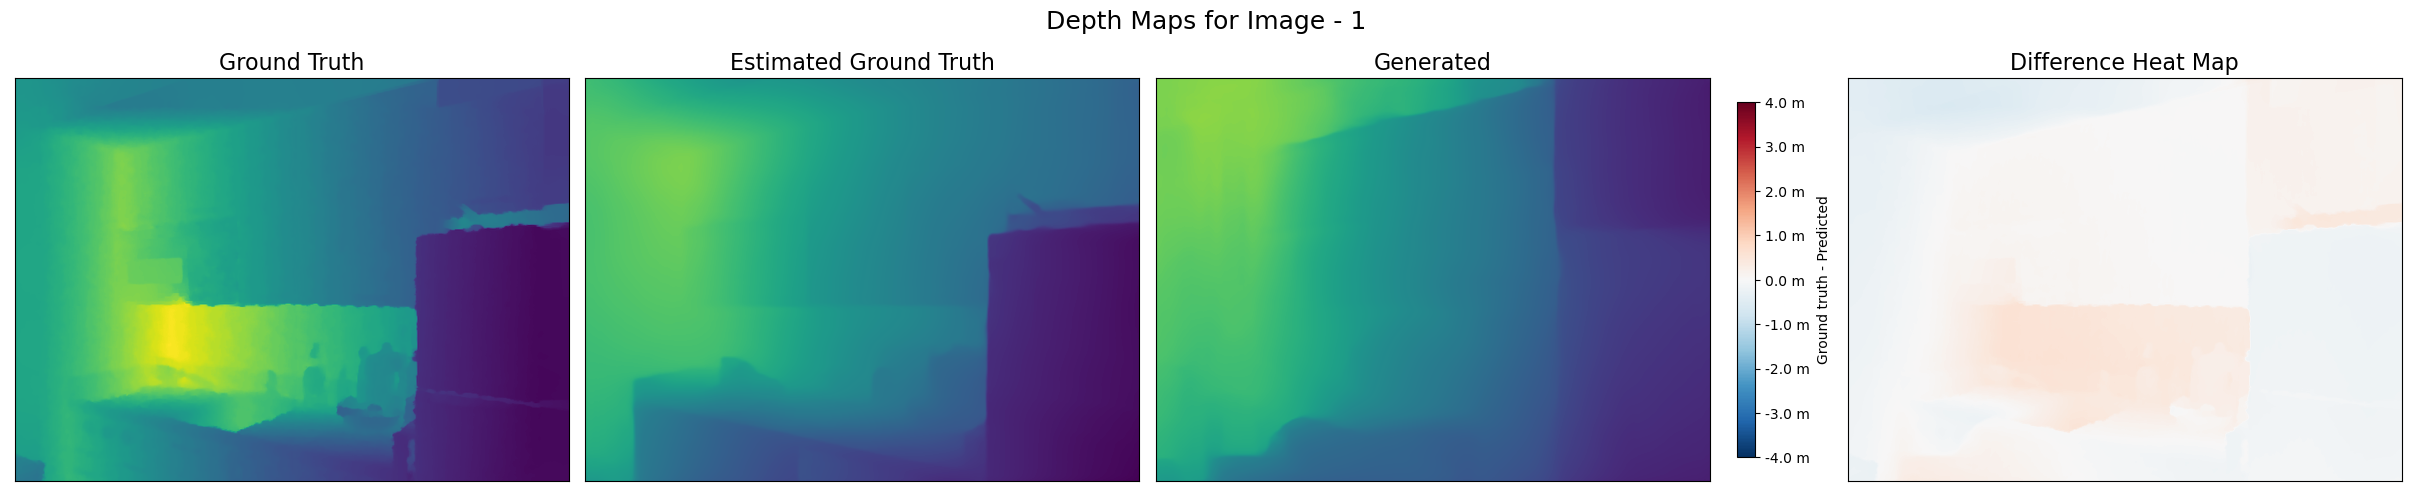

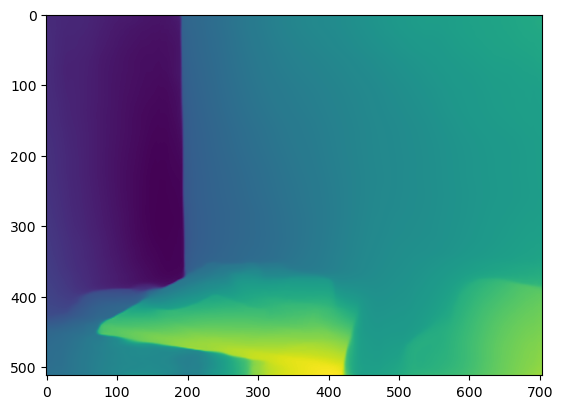

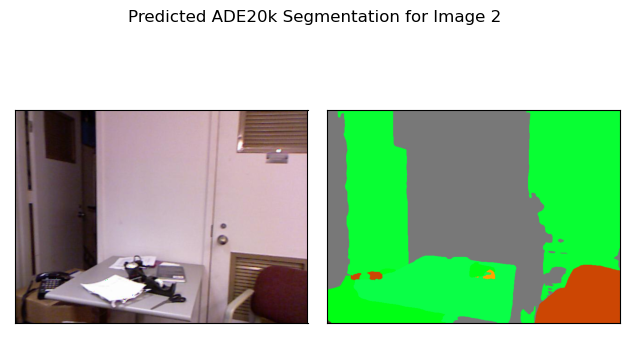

  0%|          | 0/30 [00:00<?, ?it/s]

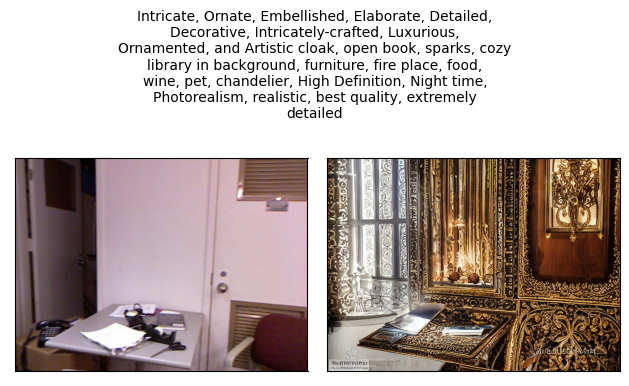

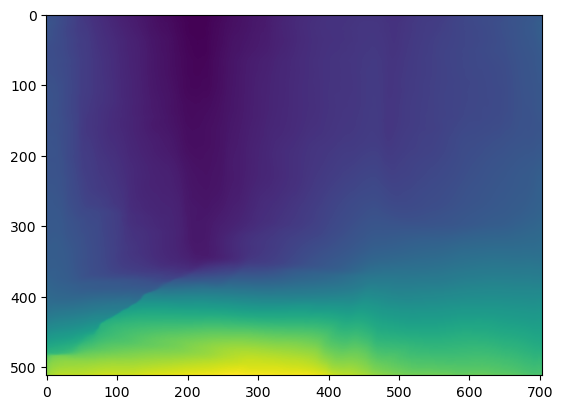

C:\Users\User\Documents\Data_Science\ar_stable_diffusion\utils\visualisation.py:30: UserWarning: FixedFormatter should only be used together with FixedLocator
  cbar.ax.set_yticklabels(["{:.2}".format(i) + " m" for i in cbar.get_ticks()])  # set ticks of your format


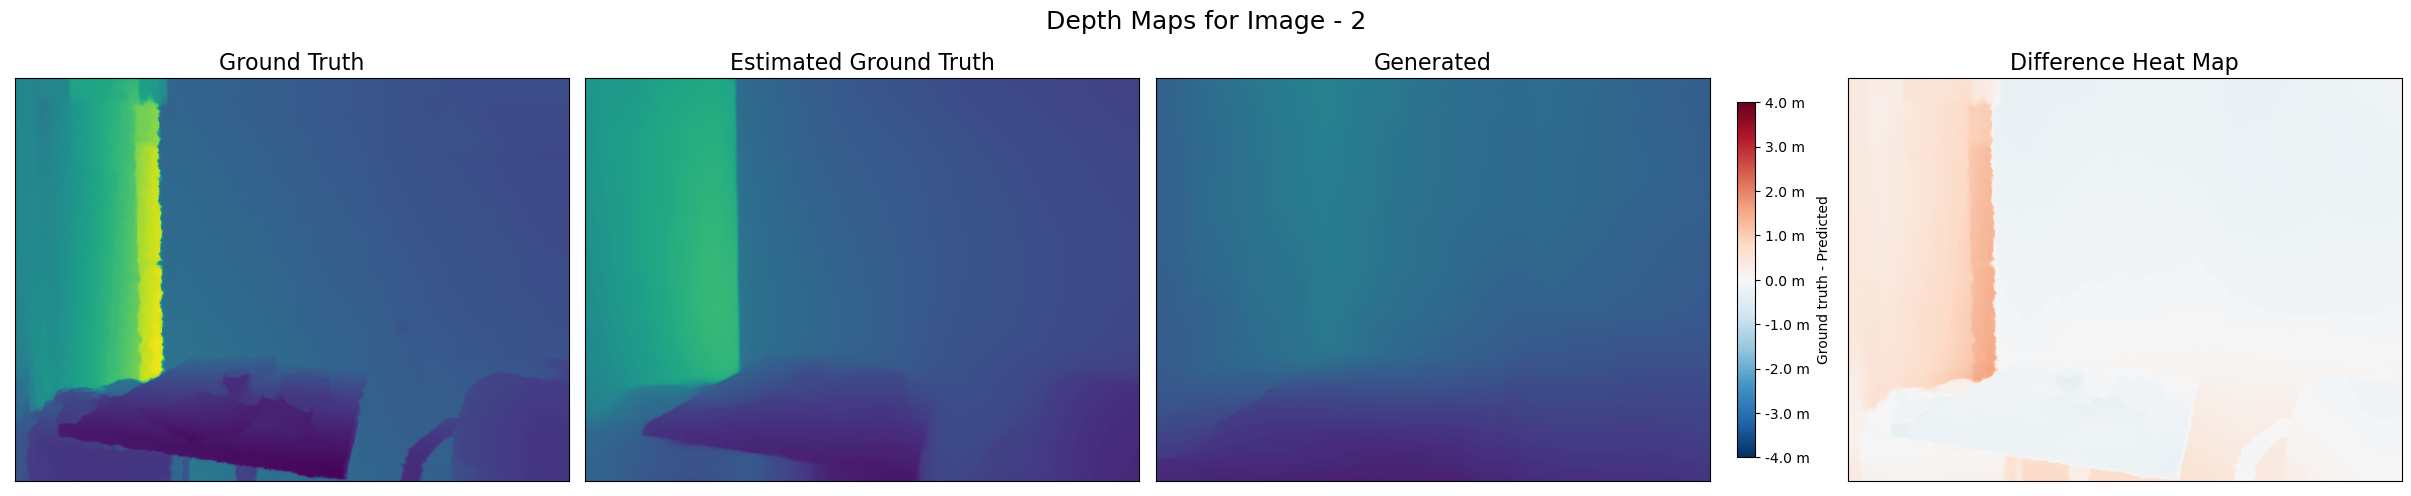

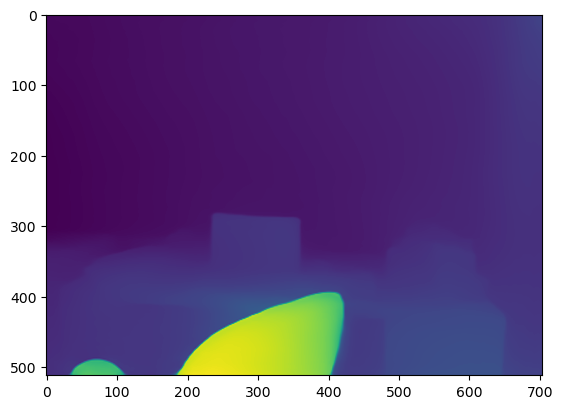

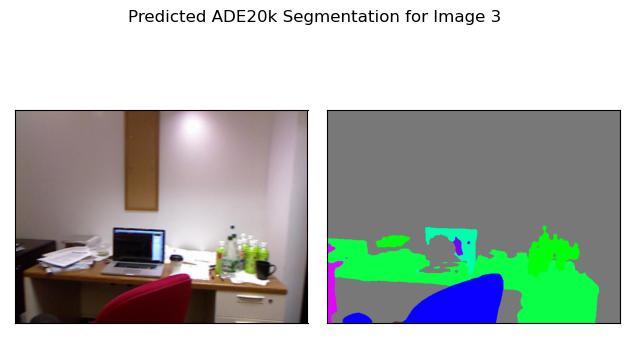

  0%|          | 0/30 [00:00<?, ?it/s]

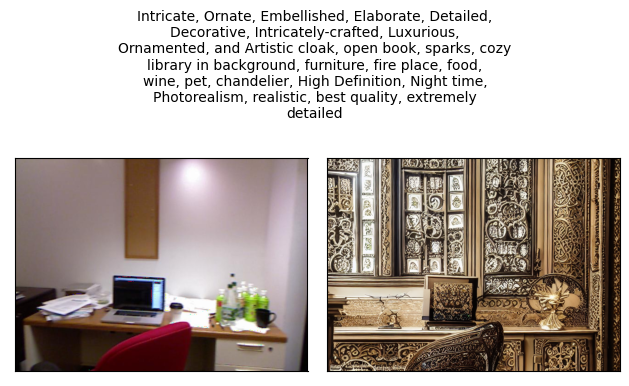

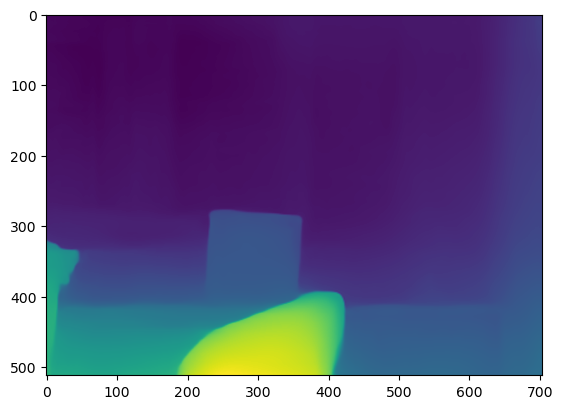

C:\Users\User\Documents\Data_Science\ar_stable_diffusion\utils\visualisation.py:30: UserWarning: FixedFormatter should only be used together with FixedLocator
  cbar.ax.set_yticklabels(["{:.2}".format(i) + " m" for i in cbar.get_ticks()])  # set ticks of your format


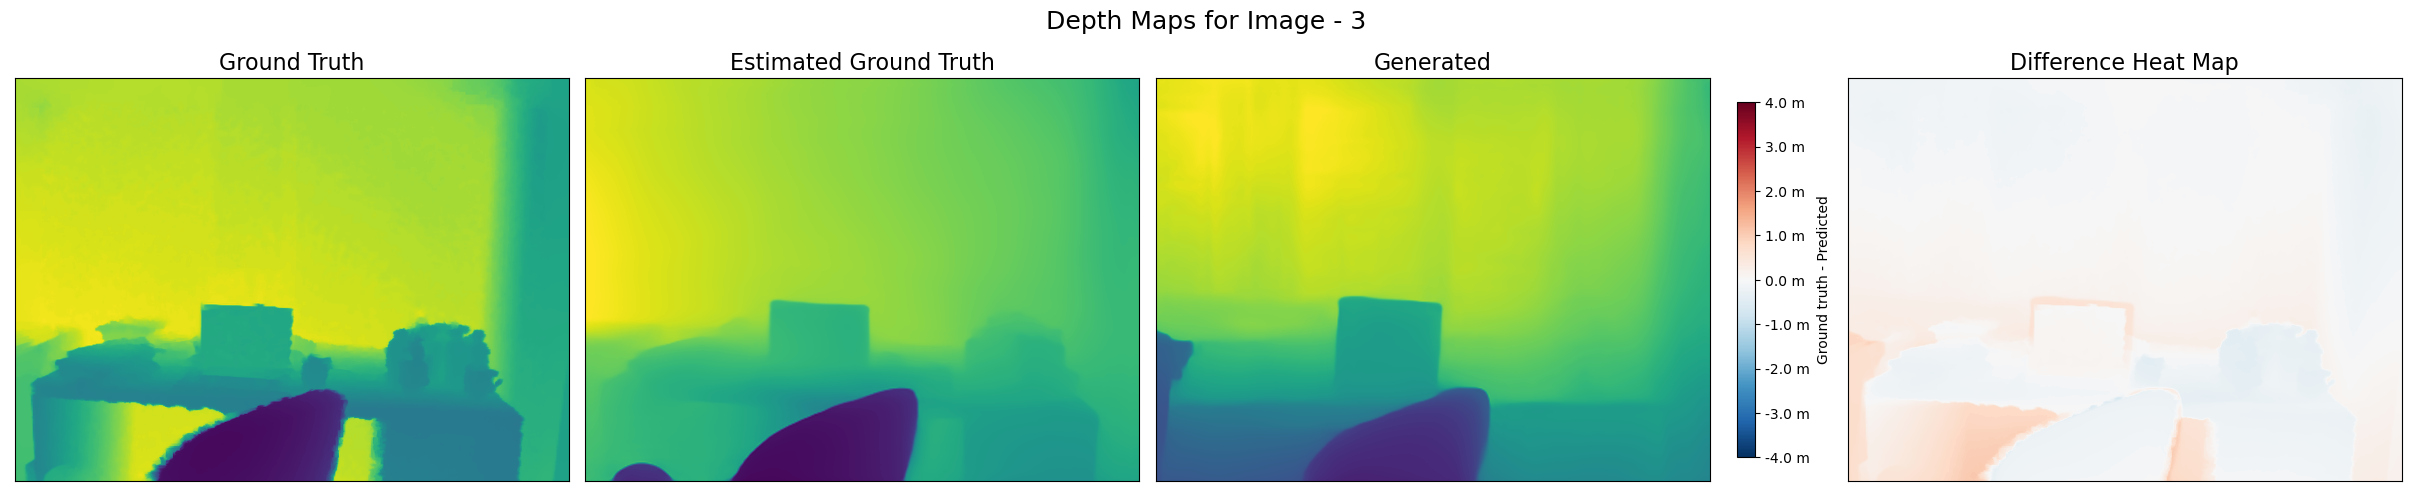

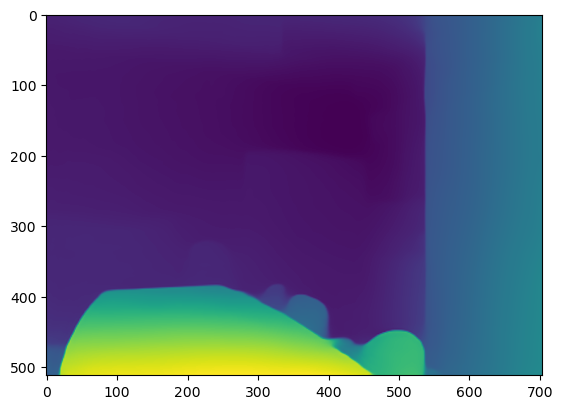

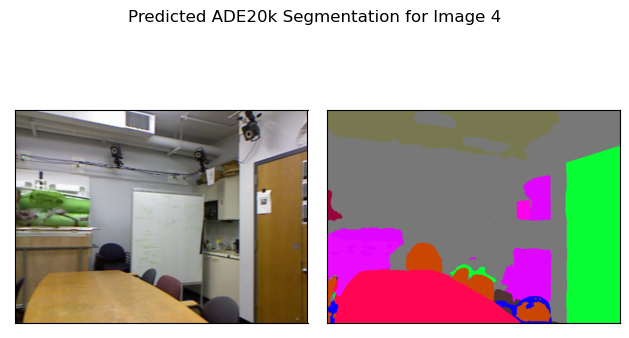

  0%|          | 0/30 [00:00<?, ?it/s]

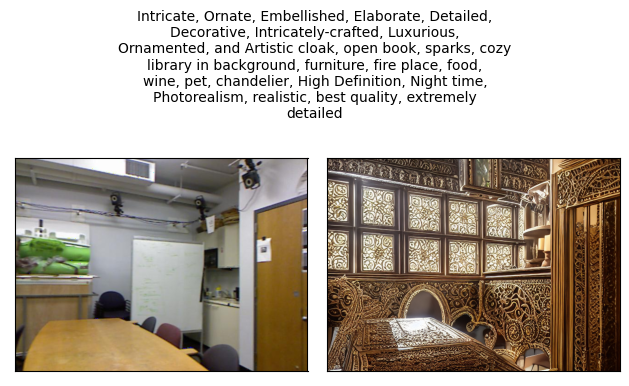

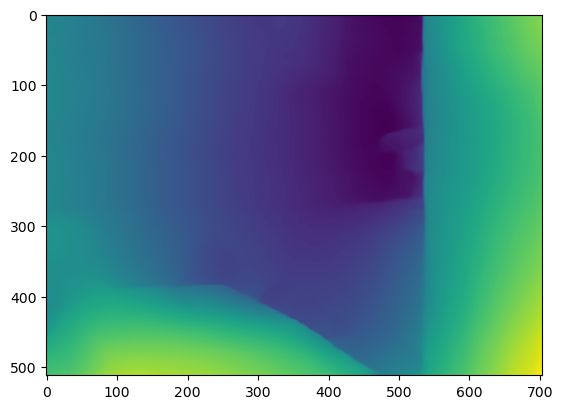

C:\Users\User\Documents\Data_Science\ar_stable_diffusion\utils\visualisation.py:30: UserWarning: FixedFormatter should only be used together with FixedLocator
  cbar.ax.set_yticklabels(["{:.2}".format(i) + " m" for i in cbar.get_ticks()])  # set ticks of your format


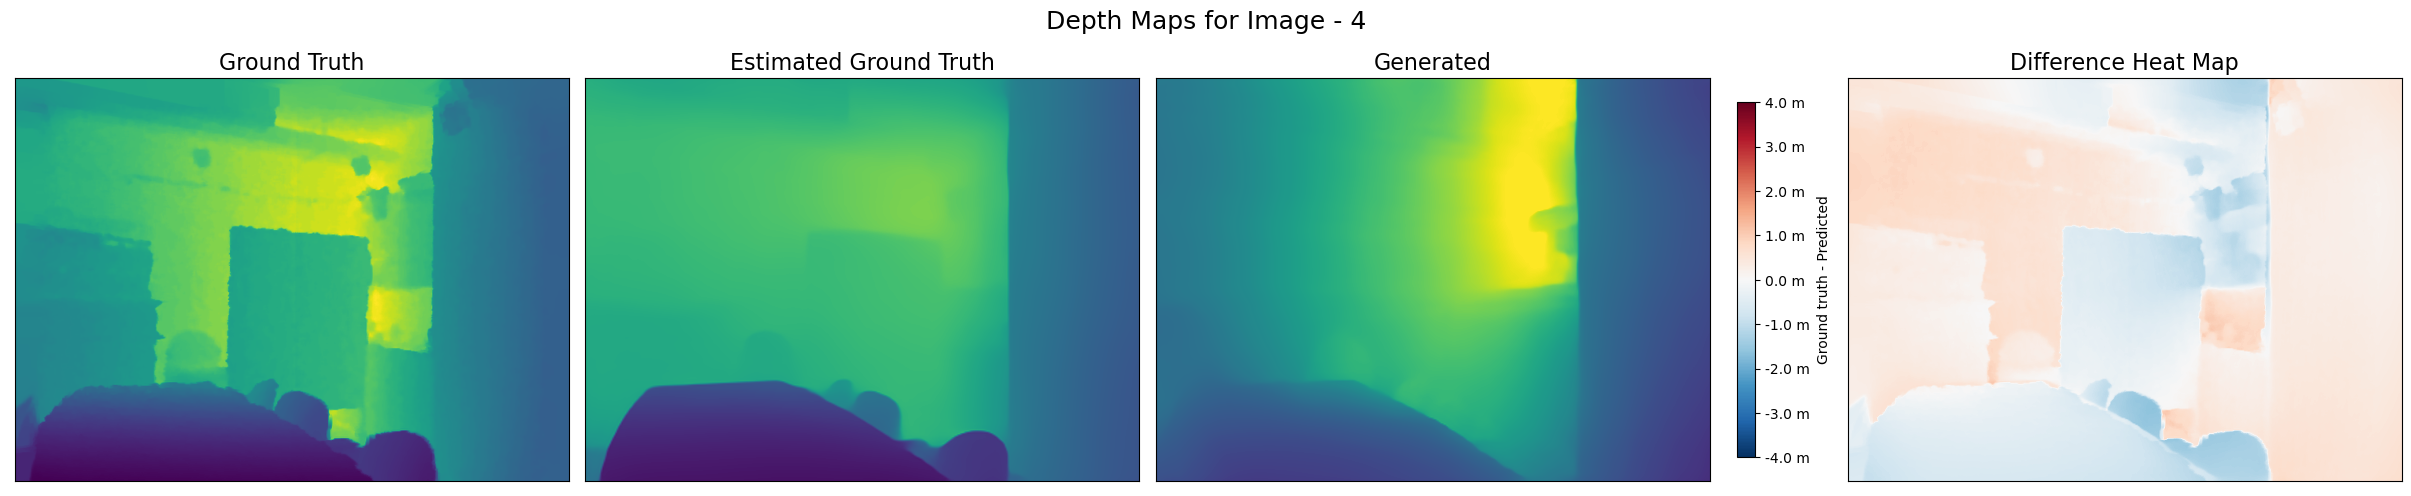

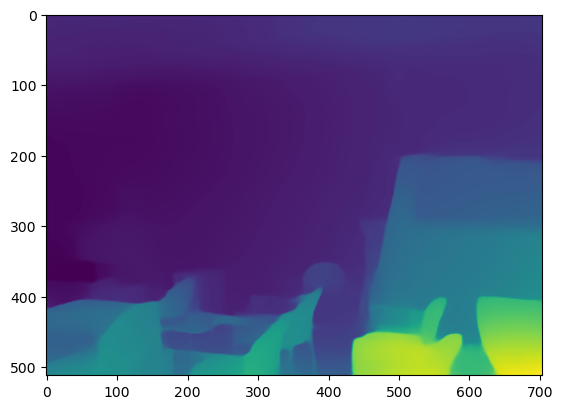

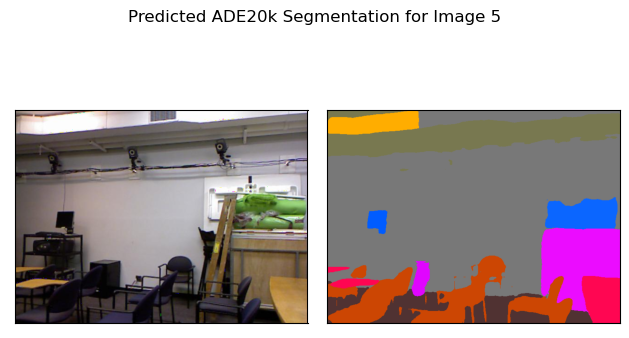

  0%|          | 0/30 [00:00<?, ?it/s]

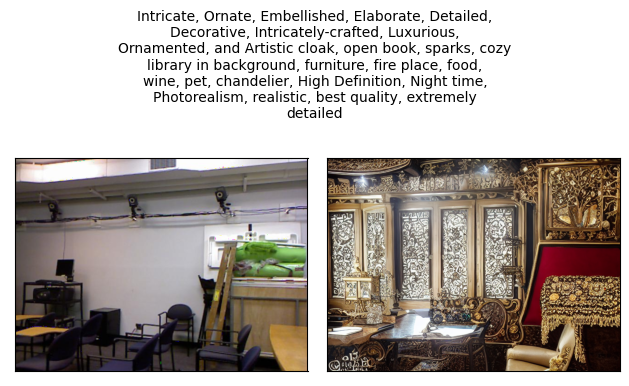

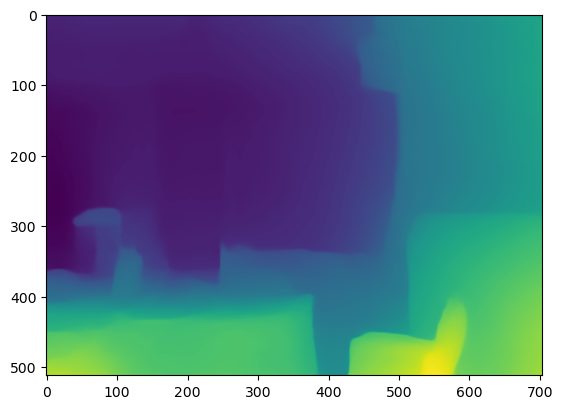

C:\Users\User\Documents\Data_Science\ar_stable_diffusion\utils\visualisation.py:30: UserWarning: FixedFormatter should only be used together with FixedLocator
  cbar.ax.set_yticklabels(["{:.2}".format(i) + " m" for i in cbar.get_ticks()])  # set ticks of your format


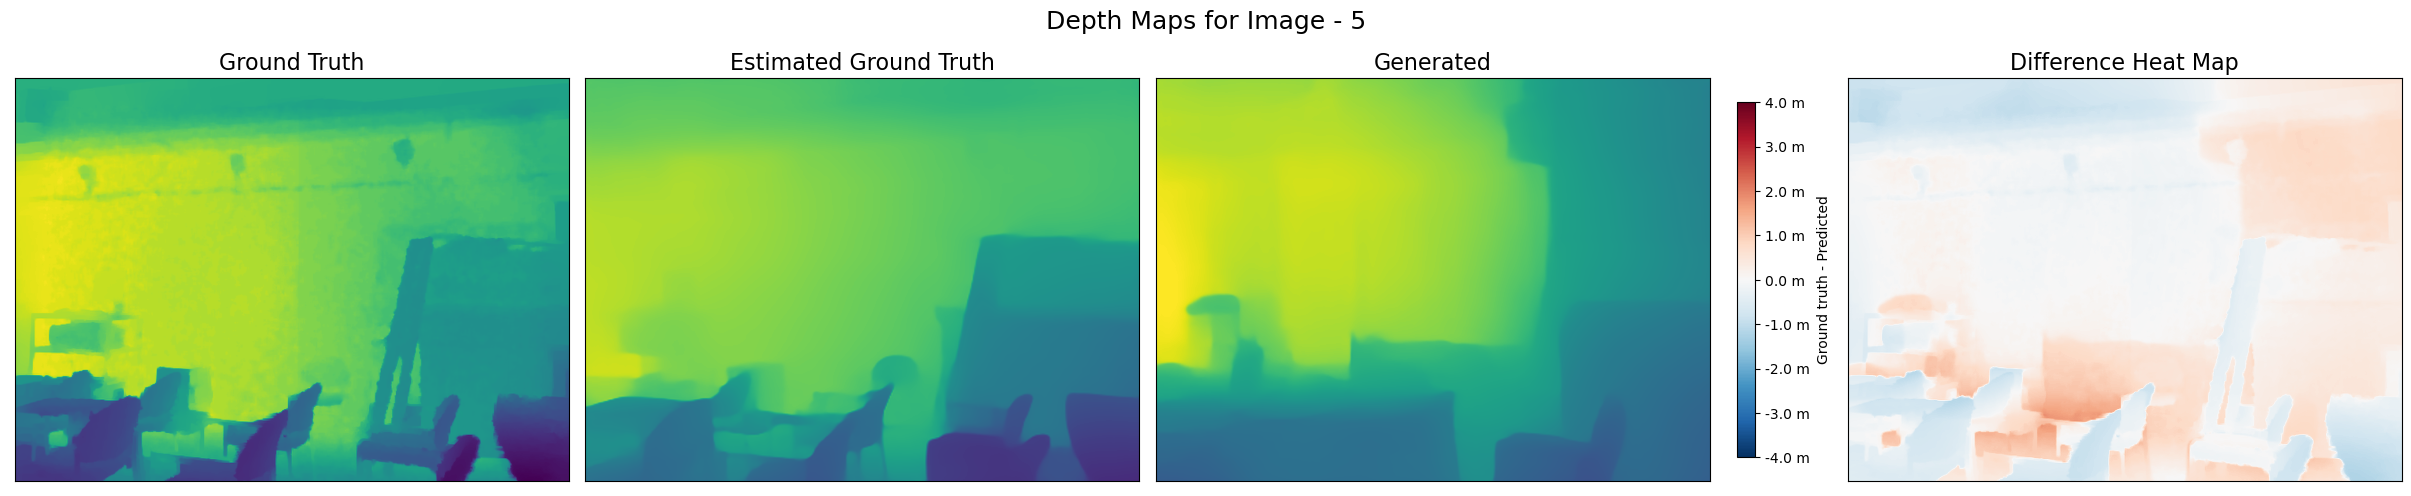

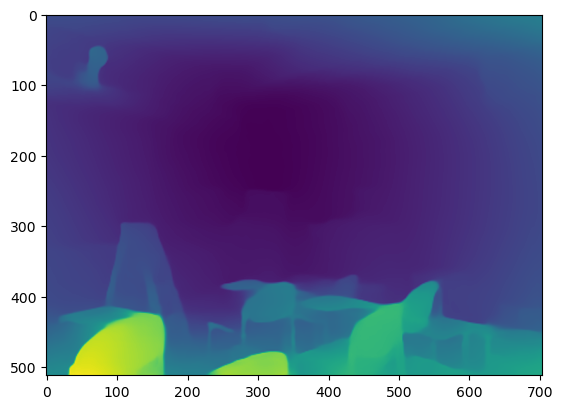

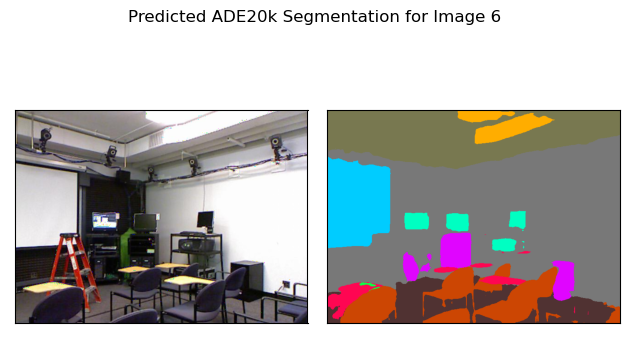

  0%|          | 0/30 [00:00<?, ?it/s]

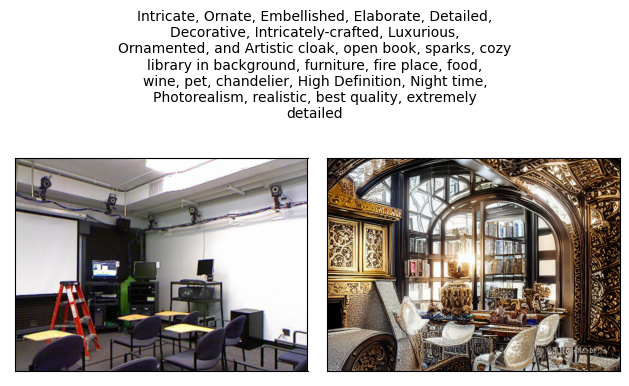

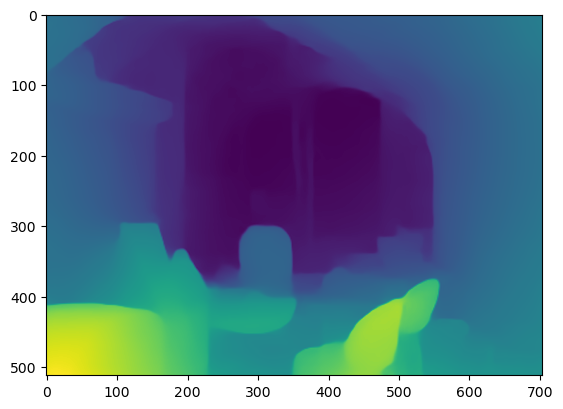

C:\Users\User\Documents\Data_Science\ar_stable_diffusion\utils\visualisation.py:30: UserWarning: FixedFormatter should only be used together with FixedLocator
  cbar.ax.set_yticklabels(["{:.2}".format(i) + " m" for i in cbar.get_ticks()])  # set ticks of your format


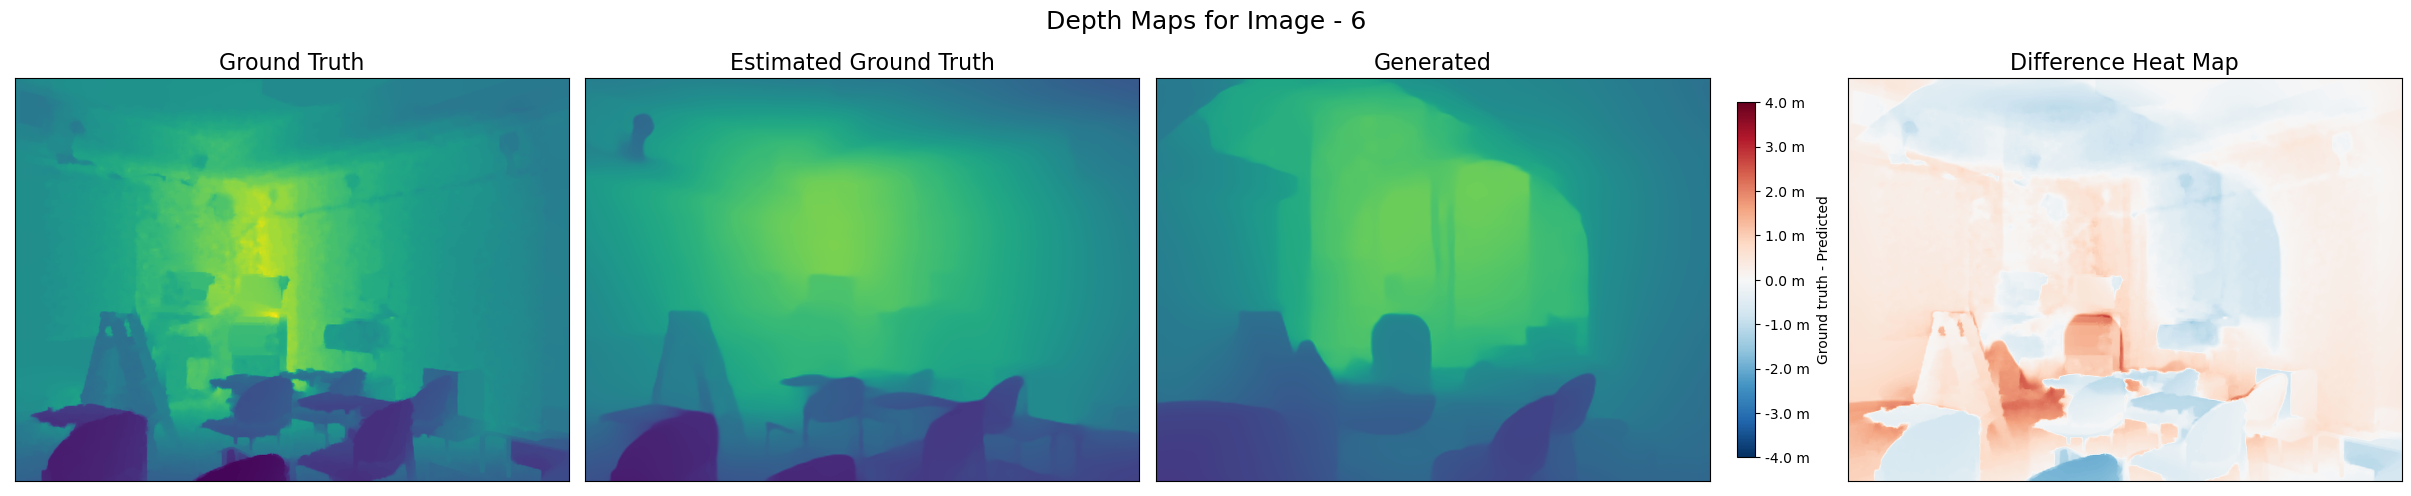

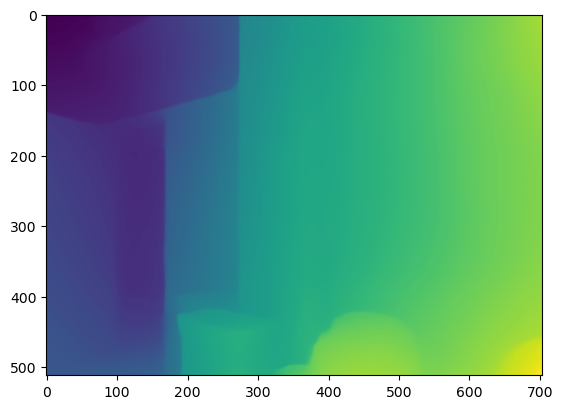

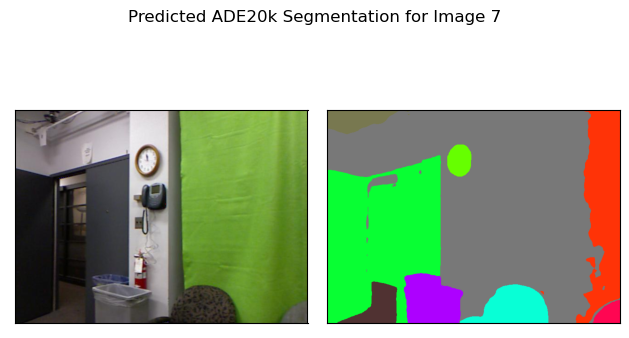

  0%|          | 0/30 [00:00<?, ?it/s]

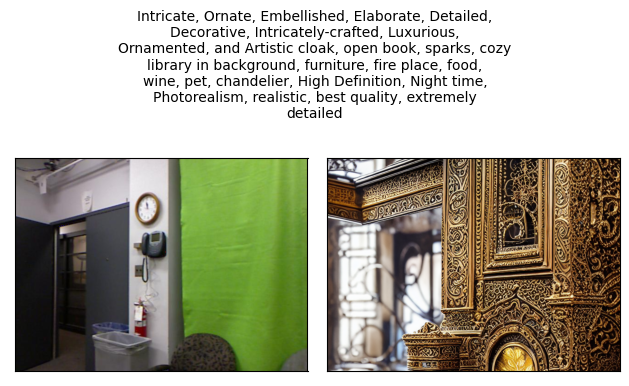

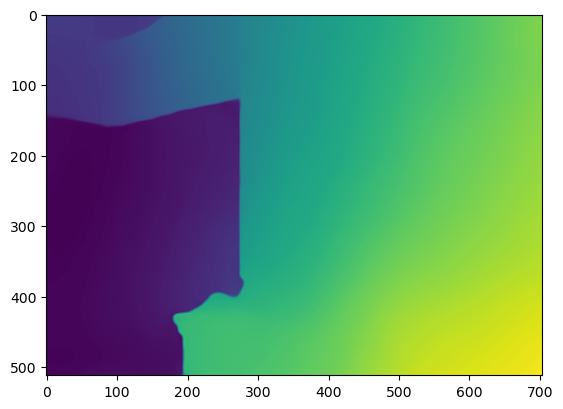

C:\Users\User\Documents\Data_Science\ar_stable_diffusion\utils\visualisation.py:30: UserWarning: FixedFormatter should only be used together with FixedLocator
  cbar.ax.set_yticklabels(["{:.2}".format(i) + " m" for i in cbar.get_ticks()])  # set ticks of your format


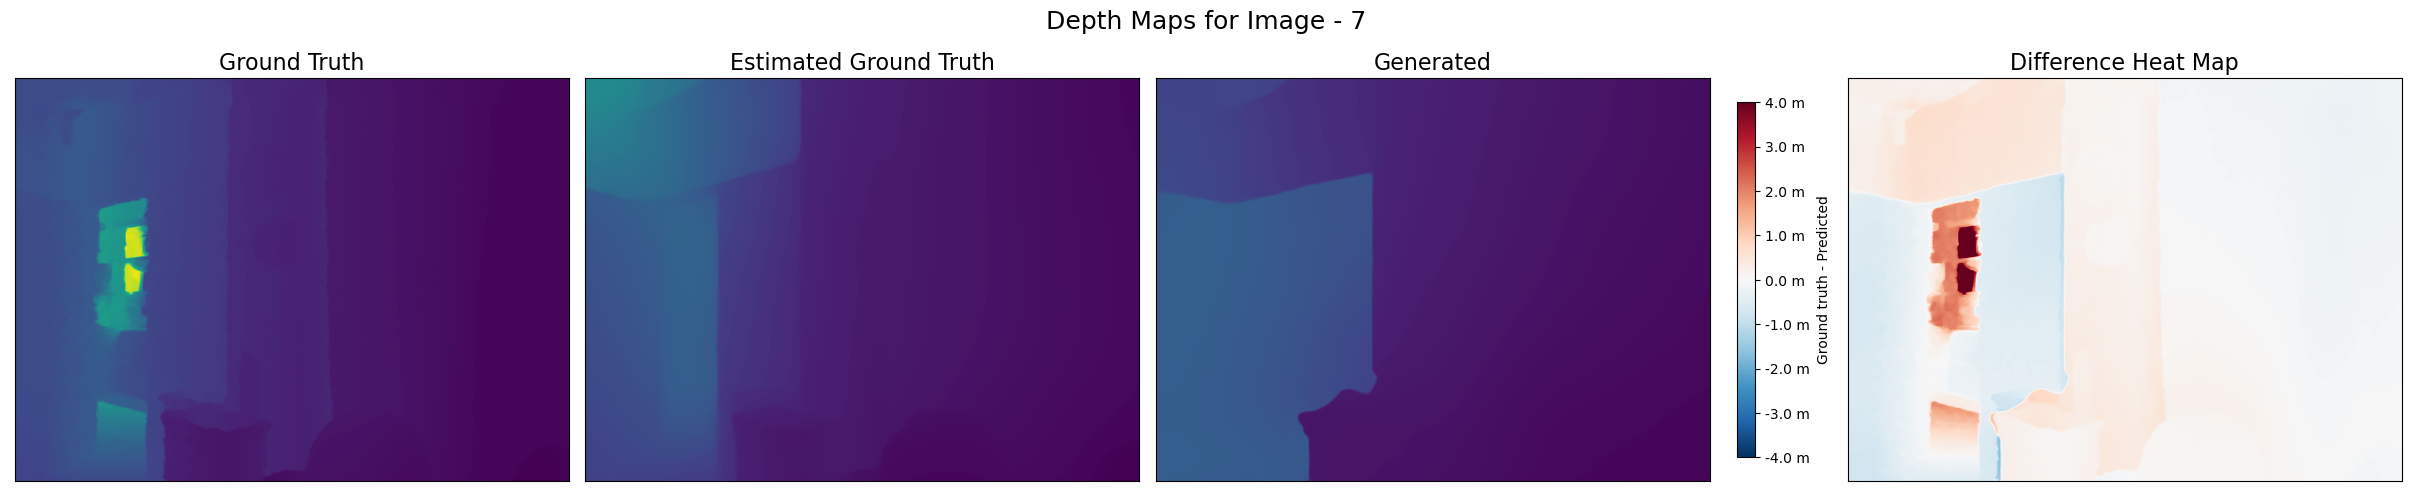

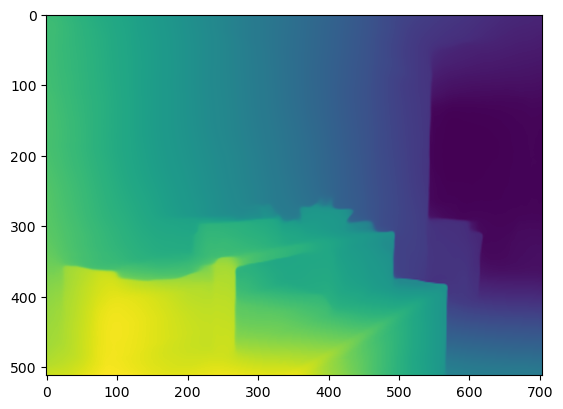

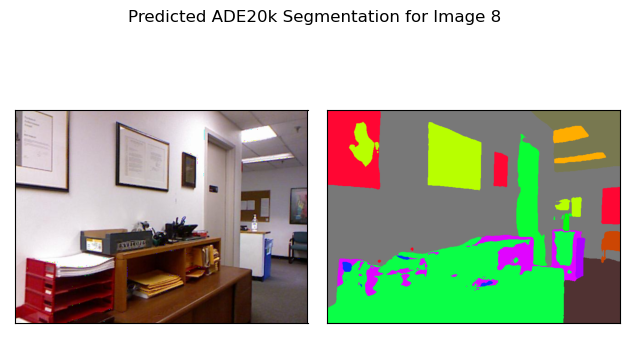

  0%|          | 0/30 [00:00<?, ?it/s]

KeyboardInterrupt: 

In [6]:
guidance_scale = 7.5
strength=0.5
num_inference_steps=30

prompt=interior_design_prompt_1


for i in range(0,rgb_images.shape[0]):
    
    pipeline.run_pipeline(rgb_images[i], depth_maps[i], i, prompt=prompt,
                     guidance_scale=guidance_scale, strength=strength,
                     num_inference_steps=num_inference_steps)
    
    
    
    #eval_list = get_eval_results(src_img_np, gen_img_np, ground_depth_map, predict_depth_map_aligned)
    
    
    #with open(eval_results_path, 'a') as f_object:
 
     #   writer_object = writer(f_object)
 
        # Pass the list as an argument into
        # the writerow()
      #  writer_object.writerow(eval_list)
 
        # Close the file object
       # f_object.close()
        

    
    
    

# Rebuilding Point Clouds for Visualisation

In [113]:
rebuild_point_clouds(a)

NameError: name 'prepare_nyu_controlnet' is not defined

In [ ]:
rebuild_point_clouds_ground_depth(a)

In [ ]:
rebuild_point_clouds_heatmap(a)

# Creating Meshes

In [ ]:
original_pcd, generated_pcd = rebuild_point_clouds(28)

In [ ]:
get_mesh_from_pcd(original_pcd, method="alpha")

In [ ]:
def evaluate(original_rgb, generated_rgb, original_depth, generated_depth):
    
    
    

In [64]:
from scipy.io import loadmat
loadmat("C:/Users/User/Downloads/classMapping40.mat")

{'__header__': b'MATLAB 5.0 MAT-file, Platform: GLNXA64, Created on: Wed Apr  3 23:24:27 2013',
 '__version__': '1.0',
 '__globals__': [],
 'className': array([[array(['wall'], dtype='<U4'), array(['floor'], dtype='<U5'),
         array(['cabinet'], dtype='<U7'), array(['bed'], dtype='<U3'),
         array(['chair'], dtype='<U5'), array(['sofa'], dtype='<U4'),
         array(['table'], dtype='<U5'), array(['door'], dtype='<U4'),
         array(['window'], dtype='<U6'),
         array(['bookshelf'], dtype='<U9'),
         array(['picture'], dtype='<U7'), array(['counter'], dtype='<U7'),
         array(['blinds'], dtype='<U6'), array(['desk'], dtype='<U4'),
         array(['shelves'], dtype='<U7'), array(['curtain'], dtype='<U7'),
         array(['dresser'], dtype='<U7'), array(['pillow'], dtype='<U6'),
         array(['mirror'], dtype='<U6'),
         array(['floor mat'], dtype='<U9'),
         array(['clothes'], dtype='<U7'), array(['ceiling'], dtype='<U7'),
         array(['books'], d

In [ ]:
def get_ground_tensors(dataset_path, condition_type="seg", index_limit = 10, image_resolution=512):

    f = h5py.File(dataset_path)
    rgb_images = f['images']
    depth_maps = f['depths']
    
    index_limit = min(index_limit,rgb_images.shape[0])
    
    for i in range(0, index_limit):
        
        
        if not prompt:
            prompt = interior_design_prompt_1

        if not self.condition_type == "depth":
            condition_img_path = self.result_root + f"depth_maps/{i}_gen_{self.condition_type}"
            predict_depth_path = self.result_root + f"depth_maps/{i}_gen_depth_from_{self.condition_type}"
            heatmap_path = self.result_root + f"depth_map_heat_maps/{i}_depth_heatmap_from_{self.condition_type}.png"
            gen_pcd_path = self.result_root + f"point_clouds/{i}_gen_pcd_from_{self.condition_type}"
        else:
            predict_depth_path = self.result_root + f"depth_maps/{i}_gen_depth"
            heatmap_path = self.result_root + f"depth_map_heat_maps/{i}_depth_heatmap.png"
            gen_pcd_path = self.result_root + f"point_clouds/{i}_gen_pcd"

        ground_pcd_path = self.result_root + f"point_clouds/{i}_ground_pcd"
        view_setting_path = self.result_root + "view_setting.json"

        gen_img_save_name = self.result_root + f"2d_images/{i}_generated_from_{self.condition_type}.png"
        comparison_save_name = self.result_root + f"2d_images/{i}_comparison_from_{self.condition_type}.png"
        
        
        src_img_np, ground_depth_map = prepare_nyu_data(rgb_images[i], depth_maps[i], image_resolution=image_resolution)
        predict_ground_depth_map = self.infer_depth_map(src_img_np)
        
        print(src_img_np.shape)
        print(ground_depth_map.shape)
        print(predict_ground_de.pth_map.shape)
        
        
    

In [ ]:
from torchmetrics.image.inception import InceptionScore

def get_eval_results(src_img_np, gen_img_np, ground_depth_map, predict_depth_map_aligned):
    
    torchmetrics.image.inception.InceptionScore(feature='logits_unbiased', splits=10, normalize=False, **kwargs)